In [1]:
from analyzers import BacteriaSegmenter
import numpy as np
import matplotlib.pyplot as plt
import mrcfile
from utils.graph_plotter import GraphPlotter
import seaborn as sns

In [2]:
test_file = "/home/mwh1998/fsl_groups/grp_tomo_db1_d1/nobackup/archive/TomoDB1_d1/FlagellarMotor_P1/Hylemonella gracilis/yc2012-09-23-13/20120923_Hylemonella_10003_full.rec"
# test_file = "/home/mwh1998/fsl_groups/grp_tomo_db1_d3/compute/TomoDB1_d3/Hneptunium_secretin/aba2006-11-01-6/Hyphomonas_10bin_full.rec"
data = None
with mrcfile.open(test_file) as mrc:
    data = mrc.data.copy()

In [13]:
def generate_rand_slice():
    height = data.shape[0]
    margin = int(height * .3)
    cropped = data[margin:(height-margin), :, :]
    selected_slice_idx = np.random.randint(0, cropped.shape[0]-5)
    selected_slice = cropped[selected_slice_idx:selected_slice_idx + 5, :, :].mean(0)

    selected_slice = (selected_slice - selected_slice.min()) / (selected_slice.max() - selected_slice.min())
    selected_slice = selected_slice - selected_slice.mean()
    return selected_slice

In [14]:
def display_image(image, image_title="Bacteria Image"):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.title(image_title)
    plt.show()

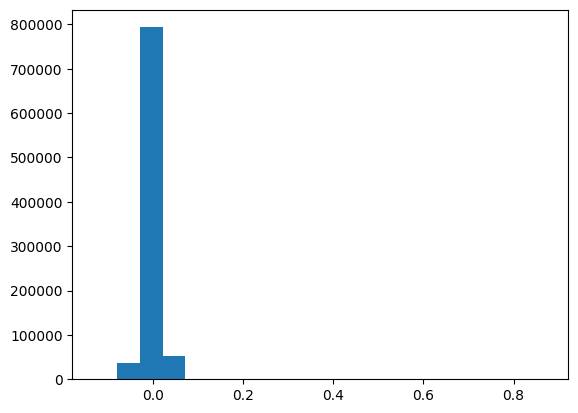

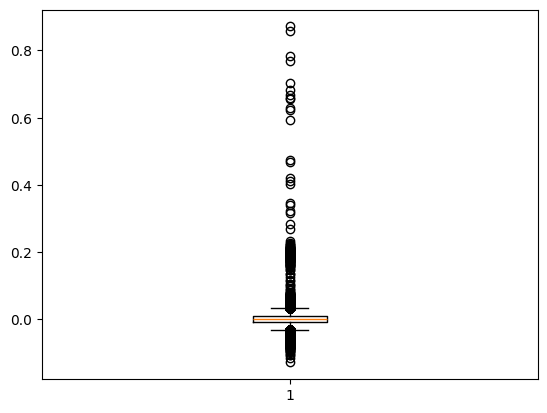

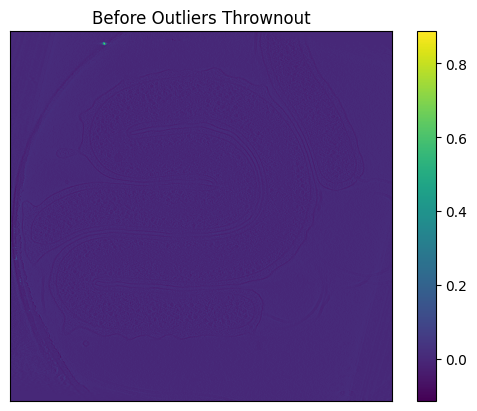

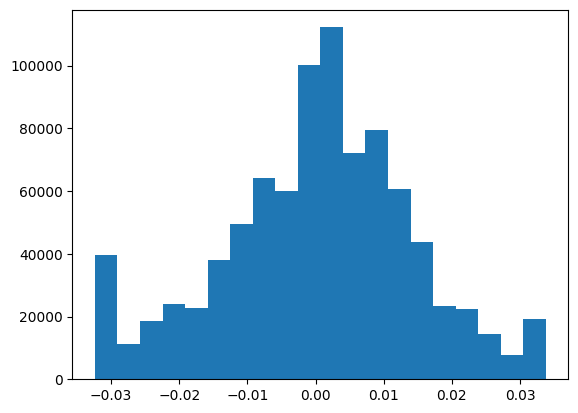

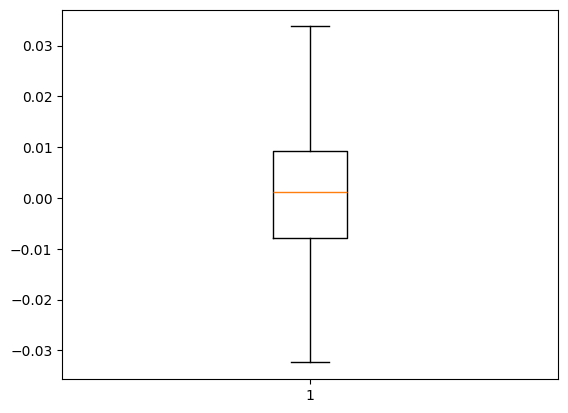

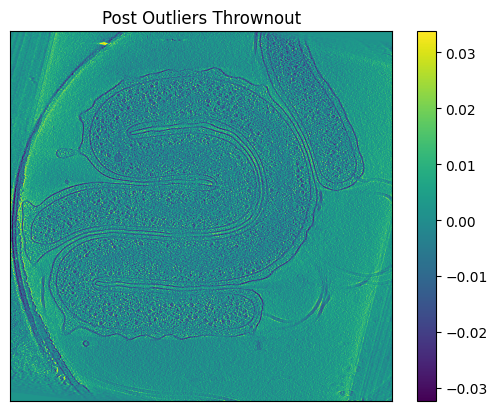

In [29]:
flattened_image = hylemonella_slice.flatten()

hylemonella_slice = generate_rand_slice()
plt.hist(flattened_image, bins=20)
plt.show()

plt.boxplot(flattened_image)
plt.show()

display_image(hylemonella_slice, "Before Outliers Thrownout")

q1 = np.percentile(flattened_image, 25)
q3 = np.percentile(flattened_image, 75)
appopriate_range = (q3-q1) * 1.5

lower_limit =  q1 - appopriate_range
upper_limit =  q3 + appopriate_range

no_outliers_hylemonella = hylemonella_slice.copy()
no_outliers_hylemonella[no_outliers_hylemonella > upper_limit] = upper_limit
no_outliers_hylemonella[no_outliers_hylemonella < lower_limit] = lower_limit

no_outliers_flattened = no_outliers_hylemonella.flatten()

plt.hist(no_outliers_flattened, bins=20)
plt.show()

plt.boxplot(no_outliers_flattened)
plt.show()

display_image(no_outliers_hylemonella, "Post Outliers Thrownout")

In [54]:
def apply_contrast(bacteria, factor):
    mean = np.mean(bacteria, axis=(0,1), keepdims=True)
    image_contrast = mean + factor * (bacteria - mean)
    image_contrast = np.clip(image_contrast, 0.0, 1.0)
    return image_contrast

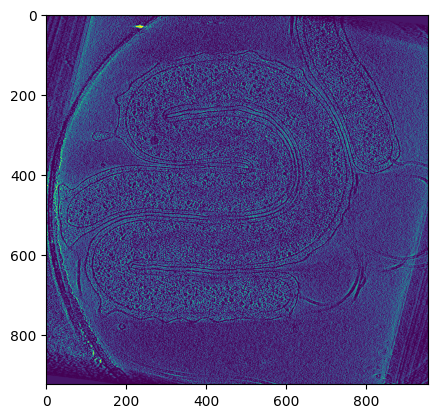

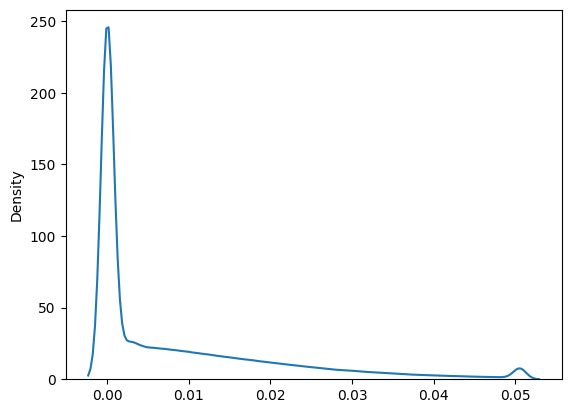

In [51]:
contrast = apply_contrast(no_outliers_hylemonella, 1)

plt.imshow(contrast)
plt.show()

sns.kdeplot(contrast.flatten())
plt.show()